# Class exercises solved

__Exercise 1.__ Suppose a coin is weighted such that, when tossed it comes up heads 70% of times. What is the entropy of this coin?

In [8]:
import numpy as np

p = 0.7

H1 = 0.7 * np.log(0.7) + 0.3 * np.log(0.3)
H1 / np.log(2)


-0.8812908992306927

__Exercise 2.__ What is the entropy of a fair dice? 

In [11]:
H2 = 6*1/6*np.log(1/6)
H2/np.log(2)

-2.584962500721156

__Exercise 3.__ What is the entropy of a dice that shows 
- "1": 20% of times, 
- "2": 10% of times,
- "3": 5% of times,
- "4": 20% of times,
- "5": 30% of times,
- "6": 15% of times    

In [12]:
H3 = 2*0.2*np.log(0.2) + 0.1*np.log(0.1) + 0.05*np.log(0.05) + 0.3*np.log(0.3) + 0.15*np.log(0.15)

-2.408694969562842

__Exercise 4.__ Compute the Kullback-Leibler divergence between the dice of Exercise 2 and the dice of Exercise 3.

In [14]:
q3 = [0.2,0.1,0.05,0.2,0.3,0.15]

DKL23 =  np.sum([1/6 * (np.log(1/6) - np.log(i)) for i in q3])

DKL23

0.14462152754328747

# Assignment 4.2

This time we are going to work with the diabetes dataset.


In [16]:
from sklearn import datasets 
import numpy as np
import matplotlib.pyplot as plt

dataset = datasets.load_diabetes(return_X_y=False)
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [17]:
# Define the feature matrix
data = dataset.data
# Define the target
target = dataset.target

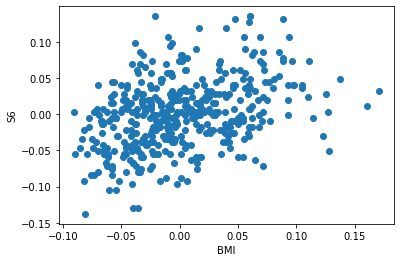

In [20]:
plt.scatter(data[:,2], data[:,9])
plt.xlabel('BMI')
plt.ylabel('S6')
plt.show()

__Exercise 1.__ Investigate the relationship between body mass index (data[:,2]) and S6 (data[:,9]). By using the AIC score seen during lesson, can you verify which hypothesis is better supported by the data?

- there is no relationship (constant)
- the relationship is linear
- the relationship is quadratic
- the relationship is cubic
- the relationship is polynomial of order 4

In [44]:
def Gaussian_loglik(x,y,w,sigma2):
    N = len(y)
    ll = -N/2 * np.log(2*np.pi*sigma2) - 1/(2*sigma2) * np.sum((y-x.dot(w.T))**2)
    return ll

def fit_poly(x,y):
    w_ml = np.linalg.solve(x.T.dot(x),x.T.dot(y))
    w_ml.reshape(1,(len(w_ml)))
    sigma2_ml = np.mean((y-x.dot(w_ml.T))**2)
    return w_ml, sigma2_ml

[-1436.0173045253575, -1506.4085348469357, -1509.367540400094, -1507.6167371574688, -1507.1778729555394]
3


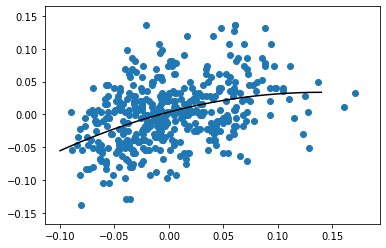

In [56]:
AIC = []
BIC = []

x = data[:,2]
y = data[:,9]

plt.scatter(x,y)


poly_order = [1,2,3,4,5]

for n_elements in poly_order:
    x_poly = np.array([x**i for i in range(n_elements)]).T
    w_ml, sigma2_ml = fit_poly(x_poly,y)

    training_ll = Gaussian_loglik(x_poly,y,w_ml,sigma2_ml)
    AIC.append(-2*training_ll + 2*n_elements)
    BIC.append(-2*training_ll + 2*n_elements*np.log(x.shape[0]))
    
print(AIC)
model = poly_order[np.argmin(AIC)]

print(model)
x_poly = np.array([x**i for i in range(model)]).T
w_ml, sigma2_ml = fit_poly(x_poly,y)

x_plot = np.arange(-0.1,0.15,0.01)
x_poly_plot = np.array([x_plot**i for i in range(model)]).T

plt.plot(x_plot, x_poly_plot.dot(w_ml), color = 'black')
plt.show()


__Exercise 2.__ Repeat the exercise by using the BIC. Discuss the differences in the results, if any.

[-1425.8346847612022, -1486.0432953186248, -1478.8196811076277, -1466.8862581008473, -1456.2647741347625]
2


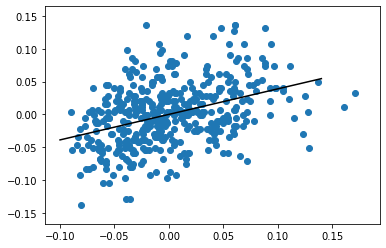

In [57]:
print(BIC)
model = poly_order[np.argmin(BIC)]

print(model)
x_poly = np.array([x**i for i in range(model)]).T
w_ml, sigma2_ml = fit_poly(x_poly,y)

x_plot = np.arange(-0.1,0.15,0.01)
x_poly_plot = np.array([x_plot**i for i in range(model)]).T

plt.scatter(x,y)
plt.plot(x_plot, x_poly_plot.dot(w_ml), color = 'black')
plt.show()

__Exercise 3.__ Which model would you support between the following:

- target depends on _Age_
- target depends on _Age_ and _Sex_
- target depends on _Age_ and _Body mass index_ 
- target depends on _Age_ and _Body mass index_ and _Average blood pressure_
- target depends on _Age_ and _Sex_ and _Body mass index_ 
- target depends on _Age_ and _Sex_ and _Body mass index_ and _Average blood pressure_
- target depends on  _Body mass index_ and _Average blood pressure_

Use any metric (or more metrics) at your discretion, and comment the results

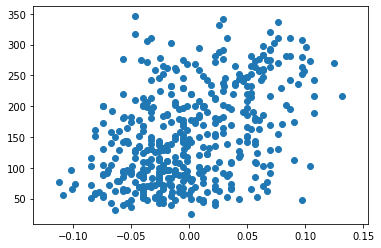

3
2


In [58]:
AIC = []
BIC = []

x = data[:,3]
y = target

plt.scatter(x,y)
plt.show()

for n_elements in [[0],[0,1],[0,2],[0,2,3],[0,1,2],[0,1,2,3]]:
    x = data[:,n_elements]
    w_ml, sigma2_ml = fit_poly(x,y)
    training_ll = Gaussian_loglik(x,y,w_ml,sigma2_ml)
    AIC.append(-2*training_ll + 2*len(n_elements))
    BIC.append(-2*training_ll + 2*len(n_elements)*np.log(x.shape[0]))
    
print(np.argmin(AIC))
print(np.argmin(BIC))